# Projectile Motion: The Trajectory of a Cannon Shell
## Eric LeVally

The following code simulates the projectile mostion of a shell fired from a cannon.  It uses the Euler Method to calculate the position and velocity of the shell at different points in time. The y component of the velocity is constantly changing because it is being acted on by the force mg created by the mass of the shell and the acceleration due to Earth's gravity.  The initial velocity of the shell and the force both lie in the xy-plane and this force points vertically downward.   When air resistance, or drag, is neglected, the x component of the velocity remains constant.  However, when air resistance is not ignored, it can be seen that it makes a large impact on the distance that the shell can travel before it reaches the ground.  

### Mathematical Model:
$$ x(t+h) = x(t) + hf(x,t) $$

The above equation (Eq. 1) is known as Euler's Method.  It is a way of approximating ordinary differential equations analytically.  If the position of the shell (x) at time (t) is known, then the Euler method can be used to calculate the position a short time later.  This method is used to calculate the x and y positions of the shell, and the x and y components of the velocity at given values of time.  The following equations (Eq. 2 - 5) of motion are derived using this method.

$$ x_{i+1} = x_{i} + v_{x,i}\Delta t$$  
$$ v_{x,i+1} =  v_{x,i}$$
$$ y_{i+1} = t_{i} + v_{y,i}\Delta t$$  
$$ v_{y,i+1} =  v_{y,i} - g\Delta t$$   

Equations 2 through 5 are the eqautions of motion for a projectile that is not experiencing air resistance.  For a projectile that is exeperiencing air resistance, a drag force must be incorporated in the equations.  The x and y components are calculated in order to allow them to be added to equations 2 through 5 to create the following equations (Eq. 6 - 9).

$$ x_{i+1} = x_{i} + v_{x,i}\Delta t$$
$$ v_{x,i+1} =  v_{x,i} - \frac{B_{2}v v_{x,i}}{m}\Delta t$$
$$ y_{i+1} = t_{i} + v_{y,i}\Delta t$$
$$v _{y,i+1} =  v_{y,i} - g\Delta t - \frac{B_{2}v v_{y,i}}{m}\Delta t$$

The boundary condition for these scenarios is that the final y position of the shell cannot be less than zero.  If the y position is equal to or less than zero anytime after the firing of the cannon, the calculation will stop because the shell has hit the ground.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def projectile_motion(delta_t,initial_v, theta, wind_speed, air_drag = False):
    
    '''Uses the input values to calculate the final position of a cannon fired at a given velocity and angle.
    
    input(s):
    delta_t the time steps
    initial_v the initial velocity of the projectile
    wind_speed the speed at which the wind is pushing against the cannon shell
    
    output(s):
    the final x position of the cannon shell
    ''' 
    
    # This is where all constants are defined
    g = 9.8
    theta = math.pi/180*theta
    drag_constant = 4*(10**-5)
    
    # This is where the initial positions and velocities of the cannon shell are set
    x = []
    y = []
    x.append(0)
    y.append(0)
    x_velocity = initial_v*math.cos(theta)
    y_velocity = initial_v*math.sin(theta) 
     
    # This is where the Euler Equations are performed
    for i in range(1,10**6,1):
        x.append(x[i-1] + x_velocity*delta_t)
        y.append(y[i-1] + y_velocity*delta_t)
        
        
        if air_drag == False:
            y_velocity = y_velocity - g*delta_t
        
        #This is where the wind_speed input is used to calculate the drag
        if air_drag == True: 
            
            current_velocity = math.sqrt(x_velocity**2 + y_velocity**2)
           
            
            if wind_speed == 0:
                Fdrag = drag_constant*current_velocity**2
                Fdrag_x = Fdrag*(x_velocity/current_velocity)
                Fdrag_y = Fdrag*(y_velocity/current_velocity)

                # This is where the new velocities are calculated
                y_velocity = y_velocity - g*delta_t - (Fdrag_y)*delta_t
                x_velocity = x_velocity -  (Fdrag_x)*delta_t
                
            if wind_speed != 0:
                Fdrag_x = drag_constant*abs(current_velocity - wind_speed)*(x_velocity-wind_speed)
                Fdrag_y = drag_constant*abs(current_velocity - wind_speed)*y_velocity
                
                # This is where the new velocities are calculated with wind
                y_velocity = y_velocity - g*delta_t - (Fdrag_y)*delta_t
                x_velocity = x_velocity -  (Fdrag_x)*delta_t
        
        if y[i] <= 0:
            break
            
    if air_drag == True and wind_speed == 0:
        plt.subplot(311)
        plt.title('Projectile Motion of a Cannon Shell With Drag')
       
              
    elif wind_speed != 0:
        plt.subplot(312)
        plt.title('Projectile Motion of a Cannon Shell With Wind')
        
        
    else:
        plt.subplot(313)
        plt.title('Projectile Motion of a Cannon Shell Without Drag')
        
    # This is the code that creates the plots   
    theta = theta/math.pi*180    
    plt.ylim(0,20000)
    plt.xlim(0,60000)
    plt.plot(x,y,label="%1.1f"%(theta))         
    plt.ylabel("y(m)")
    plt.xlabel("x(m)")
    plt.legend()           

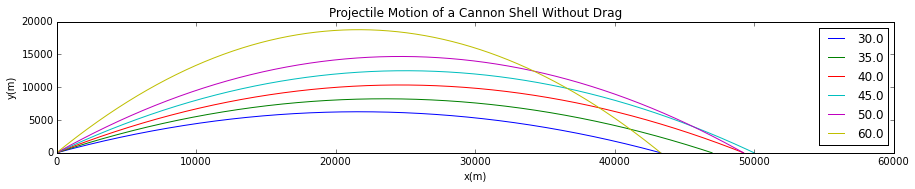

In [2]:
N = (30,35,40,45,50,60)
deltaT = 0.01
velocity = 700
wind = 0
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in (N):
    projectile_motion(deltaT, velocity, i,wind,False)
    

### Results and Analysis
The graph above shows the projectile motion of the cannon shell when air resistance is neglected and the wind speed is 0 meters per second.  In this situation, the position of the shell follows a parabolic curve because the force acting on it is a second order differintial linear function.  The initial velocity is 700 meters pers second, and the firing angle is variable.  There is only one force acting on the shell.  It is the force caused by the mass of the shell and the acceleration due to gravity.  That is why the x component of the velocity will remain constant, and the y component will not. At the top of the curve, the y component of the velocity has reached zero, and the shell begins to fall back down to the Earth.  Looking at the graph, it is clear that the optimal firing angle is 45 degrees (light blue line).  This is the angle for which the cannon shell travles the farthest distance in the x direction.  The shell travels exactly 50,000 meters when it is fired with an initial velocity of 700 meters per second, and firing angle of 45 degrees.  This is because this angle offers the highest combination of x velocity, and time spent in the air.    

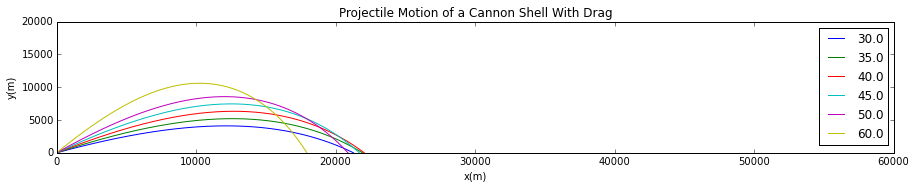

In [3]:
velocity = 700
wind = 0
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
for i in (N):
    projectile_motion(deltaT, velocity, i,wind,True)

### Results and Analysis
The graph above shows the projectile motion of a cannon shell when air resistance (drag) is not neglected, and the wind speed is still 0 meters per second.  When modeling with drag, the shell no longer follows a parabolic curve.  It now has forces acting on it in both the x and y directions.  The drag force is the aerodynamical force that opposes an objects motion through the air.  It is a mechanical force that is generated by the interaction of a solid body with a fluid.  In this situation, the solid body is the cannon shell, and the fluid is the air it is traveling through.  The drag force always acts opposite to the motion of the projectile.  Because there is now a force acting in the x direction, the x component of the velocity is no longer constant.  The first noticable aspect of the above graph is that the distance the shell travels in the x direction is reduced by more than a factor of two, compared to the previous graph.  The second is that the optimal firing angle is no longer 45 degrees.  The new optimal firing angle is 40 degrees (the red line).  This corroborates the natural intuition to fire into the wind.

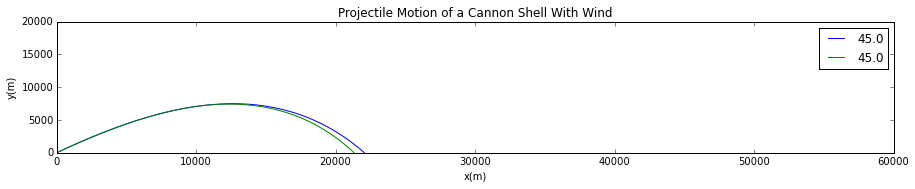

In [4]:
velocity = 700
wind1 = 7
wind2 = -7
fig=plt.figure(figsize=(15, 8), dpi= 80, facecolor='w', edgecolor='k')
projectile_motion(deltaT, velocity, 45,wind1,True)
projectile_motion(deltaT, velocity, 45,wind2,True)


### Results and Analysis
The graph above shows the projectile motion of a cannon shell fired with a head wind(green line) and a tail wind(blue line) at an angle of 45 degrees and an initial velocity of 700 meters per second. If the shell is fired into a head wind, the wind is blowing opposite the direction of motion of the cannon shell.  Relative to the air around it, the shell is now traveling 7 meters per second faster.  This means that the drag force on the shell increases.  If the shell is fired with a tail wind, the wind is blowing in the same direction of motion of the cannon shell.  Relative to the air around it, the shell is now traveling 7 meters per second slower.  This means that the drag force on the shell decreases.   With a wind speed of 7 meters per second (1 percent of the firing speed) the landing position of the shell changes by several dozen meters. 

### Scientific Summary
In the code above, I modelled the projectile  motion of a cannon shell without air resistance.  After I completed this code, i was able to add modifications so that I could model the same projectile with both air resistance, and wind.  This is important because it means that I can now use this code to calculate the projectile motion of any object provided I know its drag constant, mass, and initial speed.  I can further modify this code to incorporate the coriolis effect, adjust air resistance based on altitude, and create extremely accurate results for the final position of a cannon shell.

### Personal Summary
This project allowed me to veiw projectile motion in a new way.  Before beginning this project, I had only ever done calculations for a projectile while ignoring air resistance.  After completing this project, I now understand how much air resistance matters.  It is enough to alter the final x displacements of a cannon by a factor of 2.  This is not what I had previously understood when I read that air resistance was negligible.

### References
Giordano, Nicholas J, and Hisao Nakanishi. Computational Physics. Dorling Kindersky. 2006

M. E. J. Newman, Computational physics (Createspace, S.l., 2013).

N. Hall, Ed., What is Drag? NASA (available at https://www.grc.nasa.gov/www/k-12/airplane/drag1.html).

T. L. Chow, Classical mechanics (John Wiley & Sons, New York, 1995).